# Table of Contents
Introduction
Import
Analysis & Preprocessing
Model
Training
Analysis & Conclusion

# 1. Introduction
References:

- https://machinelearningmastery.com/feature-selection-for-regression-data/
- https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/
- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/
- https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared#:~:text=MAE%3A%20It%20is%20not%20very,the%20weighted%20individual%20differences%20equally.

# 2. Import

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils, callbacks
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import matplotlib.pyplot as plt
import numpy as np 
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 3. Analysis & Preprocessing

In [3]:
data = pd.read_excel('../../data_sets/Volumetric_features.xlsx')
data_feat = pd.DataFrame(data, columns = data.columns[:-1])
data_feat = data_feat.drop(['S.No','Age'], axis=1)

data.head(5)
data.describe()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000
mean,2113.500000,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,...,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586,4.533838
std,1220.085448,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,...,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099,3.057928
min,1.000000,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,...,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000,1.000000
25%,1057.250000,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,...,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000,1.000000
50%,2113.500000,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,...,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000,4.000000
75%,3169.750000,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,...,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000,8.000000
max,4226.000000,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,...,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000,9.000000


In [4]:
scaler = StandardScaler()
x = scaler.fit_transform(data_feat)
n = 20
pca = PCA(n_components=n)
pca_data = pca.fit_transform(x)

labels = data_feat.columns.values.tolist()
label_index = [np.abs(pca.components_[i]).argmax() for i in range(n)]
columns = [labels[label_index[i]] for i in range(n)]

pca_df = pd.DataFrame(data=pca_data, columns=columns)
print(pca_df.head)
pca_df.head()

<bound method NDFrame.head of       rh_MeanThickness_thickness  CerebralWhiteMatterVol  \
0                       1.754401                1.293658   
1                       1.417516                1.506790   
2                       2.060537                1.356490   
3                       4.321472                1.316557   
4                       3.432616                1.645476   
...                          ...                     ...   
4221                    3.508241                2.349695   
4222                    4.445945               -2.409495   
4223                    8.016491                2.326577   
4224                   -0.596625                2.547033   
4225                   -2.307309               -3.481649   

      Left-Lateral-Ventricle  lh_pericalcarine_thickness  SurfaceHoles  \
0                   1.400042                   -1.478966     -1.848772   
1                   1.654019                   -0.614001     -1.386121   
2                   1.48907

,rh_MeanThickness_thickness,CerebralWhiteMatterVol,Left-Lateral-Ventricle,lh_pericalcarine_thickness,SurfaceHoles,CC_Posterior,rh_caudalanteriorcingulate_thickness,CC_Posterior,Right-Caudate,lh_parahippocampal_thickness,MaskVol-to-eTIV,Brain-Stem,Left-vessel,Right-vessel,non-WM-hypointensities,rh_isthmuscingulate_thickness,5th-Ventricle,5th-Ventricle,lh_rostralanteriorcingulate_thickness,lh_entorhinal_thickness
0,1.754401,1.293658,1.400042,-1.478966,-1.848772,2.539626,-1.143975,-0.401122,-0.358963,1.582873,-0.187048,0.209257,-1.568421,0.575948,-0.396241,0.533530,0.052257,-0.504310,0.757531,-0.422710
1,1.417516,1.506790,1.654019,-0.614001,-1.386121,2.361501,-1.447363,-0.844003,-0.757418,1.738769,0.214804,0.415871,-1.436860,0.206113,-0.794917,0.176967,-0.410607,-0.512574,1.251018,-0.393669
2,2.060537,1.356490,1.489074,-1.055623,-1.176158,2.161189,-2.168337,-0.805680,-1.120962,1.480457,0.099160,0.376384,-0.886978,0.688299,-0.881096,0.397028,-0.605281,-0.206022,0.871157,-0.859068
3,4.321472,1.316557,1.100188,-0.240118,-1.374965,2.411123,-1.143665,-1.558788,-0.835127,1.332337,0.311221,-0.305927,-1.329661,0.539914,-0.262982,0.167378,-0.243812,-0.233506,0.802075,-0.969425
4,3.432616,1.645476,2.126696,-0.804164,-1.324106,3.070594,-1.211187,-0.811768,-0.528026,1.545616,-0.073550,0.434925,-1.436719,1.267570,-0.848368,-0.023117,0.101645,-0.462372,1.381600,-0.422679


In [5]:
# Split for validation --> train, val, test = 80/15/5
# train to test (val and test) --> include random shuffle
x_train, x_validation, y_train, y_validation = train_test_split(pca_df, data['Age'], test_size=0.20, random_state=33)

# (20% of total dataset -> 75% validation = 15% total, 25% validation = 5% total
# val and test --> include random shuffle
x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (3380, 20)
y_train shape is: (3380,) 

x_val shape is: (634, 20)
y_val shape is: (634,) 

x_test shape is: (212, 20)
y_test shape is: (212,)


# 4. Model

In [61]:
# end with 3 neurons for each class --> 1 (Normal), 2 (Suspect) and 3 (Pathological)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=x_train.shape[1], name='input'))

model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Dense(1, activation='linear', name='output'))

opt = Adam(learning_rate=0.0025)

model.compile(
            loss='mean_absolute_error',
            optimizer=opt,
            metrics= ['mean_absolute_error']
            )

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 128)               2688      
                                                                 
 batch_normalization_71 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 activation_79 (Activation)  (None, 128)               0         
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_80 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_72 (Bat  (None, 256)              1024      
 chNormalization)                                    

# 5. Training

In [62]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=15, restore_best_weights = True)

# train the model
hist = model.fit(
    x_train, 
    y_train, 
    epochs=200, 
    batch_size=256,
    validation_data=(x_val, y_val), 
    callbacks = [earlystopping]
)

Epoch 1/200
14/14 [==============================] - 2s 62ms/step - loss: 57.9875 - mean_absolute_error: 57.9875 - val_loss: 68.2866 - val_mean_absolute_error: 68.2866
Epoch 2/200
14/14 [==============================] - 0s 21ms/step - loss: 55.0752 - mean_absolute_error: 55.0752 - val_loss: 61.2783 - val_mean_absolute_error: 61.2783
Epoch 3/200
14/14 [==============================] - 0s 18ms/step - loss: 52.6577 - mean_absolute_error: 52.6577 - val_loss: 52.3720 - val_mean_absolute_error: 52.3720
Epoch 4/200
14/14 [==============================] - 0s 17ms/step - loss: 50.1742 - mean_absolute_error: 50.1742 - val_loss: 47.7643 - val_mean_absolute_error: 47.7643
Epoch 5/200
14/14 [==============================] - 0s 16ms/step - loss: 47.2877 - mean_absolute_error: 47.2877 - val_loss: 45.4951 - val_mean_absolute_error: 45.4951
Epoch 6/200
14/14 [==============================] - 0s 17ms/step - loss: 43.9716 - mean_absolute_error: 43.9716 - val_loss: 42.2484 - val_mean_absolute_error: 

14/14 [==============================] - 0s 14ms/step - loss: 5.3187 - mean_absolute_error: 5.3187 - val_loss: 5.6506 - val_mean_absolute_error: 5.6506
Epoch 51/200
14/14 [==============================] - 0s 14ms/step - loss: 5.2257 - mean_absolute_error: 5.2257 - val_loss: 5.3419 - val_mean_absolute_error: 5.3419
Epoch 52/200
14/14 [==============================] - 0s 14ms/step - loss: 5.1196 - mean_absolute_error: 5.1196 - val_loss: 5.6424 - val_mean_absolute_error: 5.6424
Epoch 53/200
14/14 [==============================] - 0s 14ms/step - loss: 5.2264 - mean_absolute_error: 5.2264 - val_loss: 5.6571 - val_mean_absolute_error: 5.6571
Epoch 54/200
14/14 [==============================] - 0s 15ms/step - loss: 5.1613 - mean_absolute_error: 5.1613 - val_loss: 5.8148 - val_mean_absolute_error: 5.8148
Epoch 55/200
14/14 [==============================] - 0s 16ms/step - loss: 5.0761 - mean_absolute_error: 5.0761 - val_loss: 6.3250 - val_mean_absolute_error: 6.3250
Epoch 56/200
14/14 [===

# 6. Analysis & Conclusion

In [63]:
y_pred = model.predict(x_test)

print("Explained variance: " + str(metrics.explained_variance_score(y_test, y_pred)))
print("Max Error: " + str(metrics.max_error(y_test, y_pred)))
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print("Root Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred, squared=False)))
print("R2: " + str(metrics.r2_score(y_test, y_pred)))

Explained variance: 0.8831901333618151
Max Error: 25.606857299804688
Mean absolute error: 4.917904655888395
Mean squared error: 45.80640497681754
Root Mean squared error: 6.768042920728084
R2: 0.8831733708137876


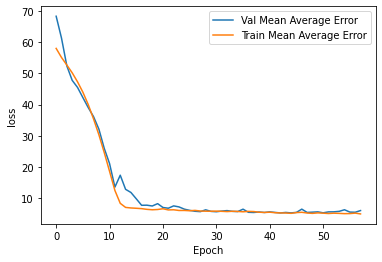

In [65]:
x = list(range(58))
vy = hist.history['val_loss']
ty = hist.history['loss']

plt.plot( x, vy, label='Val Mean Average Error')
plt.plot( x, ty, label='Train Mean Average Error')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()